In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from flax import jax_utils
import jax
import ml_collections

import numpy as np
import matplotlib.pyplot as plt

import input_pipeline
import train
from configs import default as config_lib

In [2]:
tf.config.experimental.set_visible_devices([], "GPU")

In [3]:
# Load config that was used to train checkpoint.
import importlib

config_name = "default"
config = importlib.import_module(f'configs.{config_name}').get_config()

In [4]:
local_batch_size = config.batch_size // jax.process_count()
input_dtype = train.get_input_dtype(config.half_precision)

dataset_builder = tfds.builder(config.dataset)
dataset_builder.download_and_prepare()
train_iter = train.create_input_iter(
    dataset_builder,
    local_batch_size,
    config.image_size,
    input_dtype,
    train=True,
    cache=config.cache,
    ignore_label=config.ignore_label
    )
eval_iter = train.create_input_iter(
    dataset_builder,
    local_batch_size,
    config.image_size,
    input_dtype,
    train=False,
    cache=config.cache,
    ignore_label=config.ignore_label
)

In [5]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        print(np.unique(display_list[i][0]))
        plt.imshow(tf.keras.utils.array_to_img(display_list[i][0]))
        plt.axis('off')
    plt.show()

[-1.9118717 -1.9106494 -1.9067866 ...  2.2498202  2.2974436  2.2977324]
[ 4  7 11 12 13 17 19 20 21 23 26]


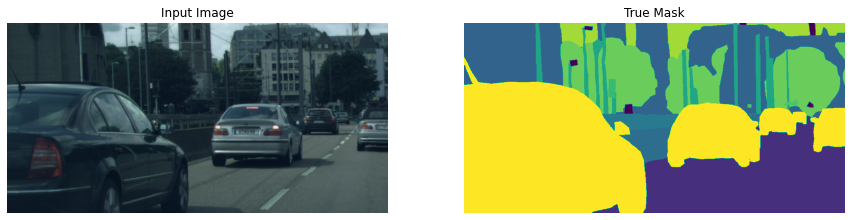

[-1.8014872 -1.7676874 -1.7611235 ...  2.1137202  2.1138184  2.1138706]
[ 0  1  4  6  7  8 11 17 20 21 22 24 26]


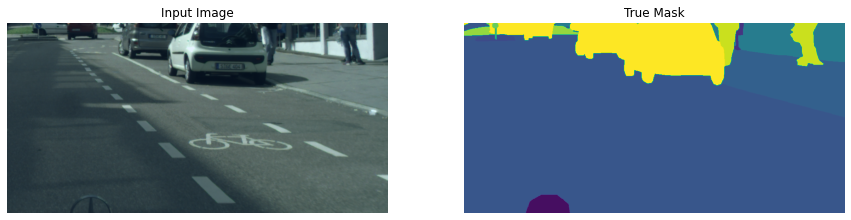

[-2.0683892 -2.0665689 -2.0648513 ...  2.7240944  2.724376   2.7604885]
[ 2  4  5  6  7  8 11 13 15 17 19 20 21 23 24 26]


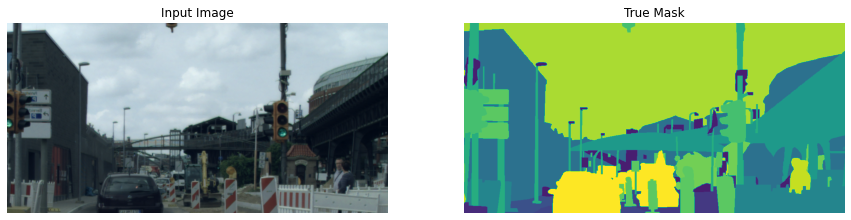

[-2.2332387 -2.1611845 -2.1291552 ...  3.0045595  3.0045738  3.0045834]
[ 4  7  8 11 13 17 20 21 23 24 26]


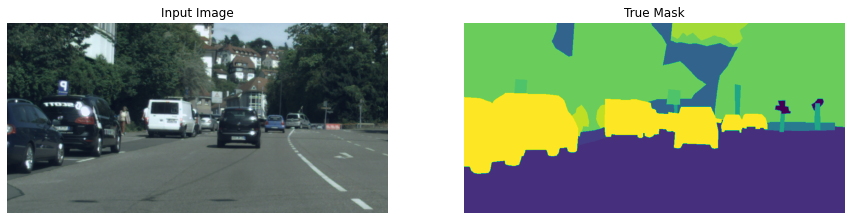

[-1.9996307 -1.996707  -1.9964952 ...  2.9962332  2.996872   3.001811 ]
[ 1  5  7  8 11 12 21 26]


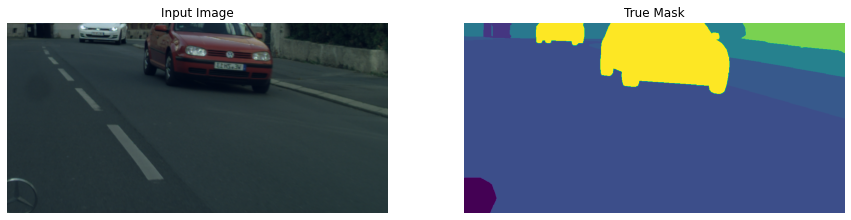

In [6]:
for _ in range(5):
    train_batch = next(train_iter)
    image = train_batch["image"]
    label = train_batch["label"]
    display([np.array(image[0]), np.array(label[0])])

[-1.9894683 -1.9766247 -1.9680624 ...  2.6312857  2.6356428  2.64     ]
[ 1  3  4  5  7  8 11 12 13 17 19 20 21 23 25 26 27 28 32 33]


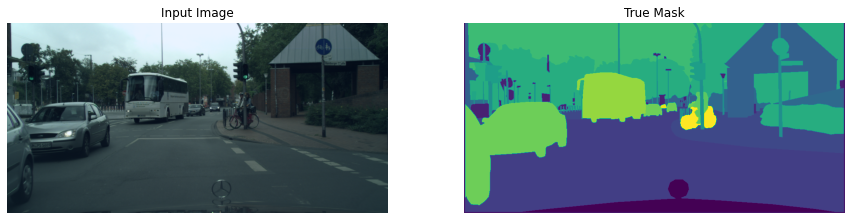

[-1.9295317 -1.9252505 -1.9252504 ...  2.6312857  2.6356428  2.64     ]
[ 1  3  4  5  6  7  8 11 12 17 18 20 21 22 26 28]


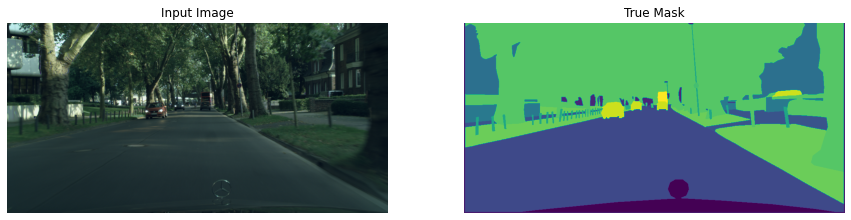

[-1.9252505 -1.9209692 -1.9166881 ...  2.6312857  2.6356428  2.64     ]
[ 1  3  4  5  7  8  9 11 12 17 20 21 23 24 25 26 33]


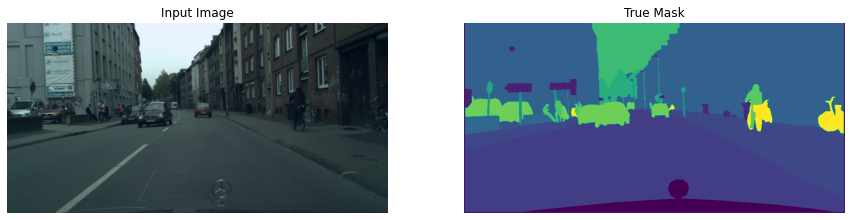

[-1.8267832 -1.822502  -1.8182209 ...  2.6312857  2.6356428  2.64     ]
[ 1  3  4  5  7  8 11 17 20 21 22 23 26]


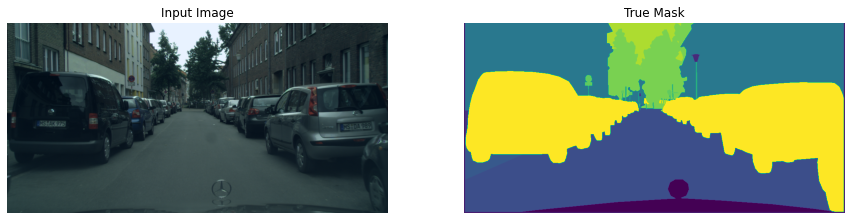

[-2.0536861 -2.0494049 -2.0451236 ...  1.812227   2.197534   2.2489083]
[ 1  3  4  5  6  7  8 11 12 13 17 20 21 22 23 24 26]


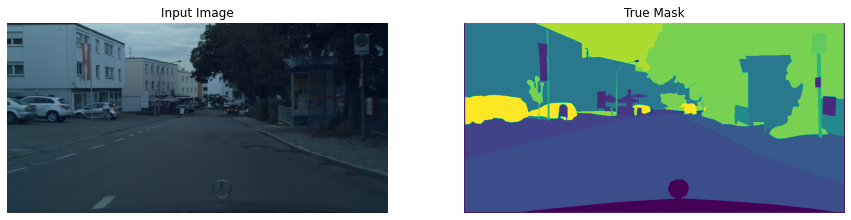

In [7]:
for _ in range(5):
    eval_batch = next(eval_iter)
    image = eval_batch["image"]
    label = eval_batch["label"]
    display([np.array(image[0]), np.array(label[0])])

In [9]:
for _ in range(1000):
    train_batch = next(train_iter)
    # eval_batch = next(eval_iter)
    label = train_batch["label"]
    label = np.array(label)
    print(np.min(label), np.max(label))
    

0 33
0 33
1 33
0 33
4 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
4 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
4 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
1 30
1 33
2 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
4 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
1 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
1 33
0 33
0 33
1 33
0 33
0 33
1 33
0 33
0 33
0 33
1 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
1 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
0 33
4 33
0 33
0 33
1 33
0 33
0 33
0 33
0 33


KeyboardInterrupt: 